In [14]:
import pandas as pd
from google.colab import files  # Only needed if you're using Google Colab

# Step 1: Manually upload the file
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Step 3: Read the uploaded CSV file
df = pd.read_csv(file_name)

# Step 4: Display the first few rows
print(df.head())

# Step 5: Get a summary of the data
print(df.info())


Saving train.csv to train (1).csv
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code R

In [15]:
# Check for missing values in each column
print(df.isnull().sum())

# Safely fill missing values in 'Postal Code' with 0 and ensure it's int64
df.fillna({'Postal Code': 0}, inplace=True)
df['Postal Code'] = df['Postal Code'].astype('int64')

# Verify the fix
print(df.info())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   

In [16]:
# Convert 'Order Date' to datetime safely (day first)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Check if any conversions failed
print(df['Order Date'].isnull().sum(), "rows could not be converted.")

# Display a few converted values
print(df['Order Date'].head())


0 rows could not be converted.
0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]


In [17]:
# Example: Extract Year and Month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [18]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $2,261,536.78


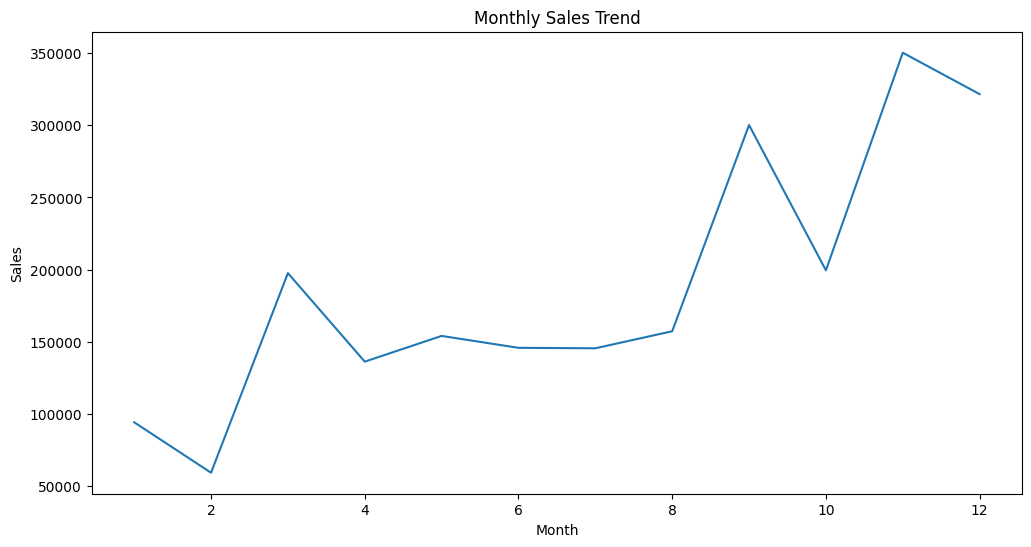

In [19]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


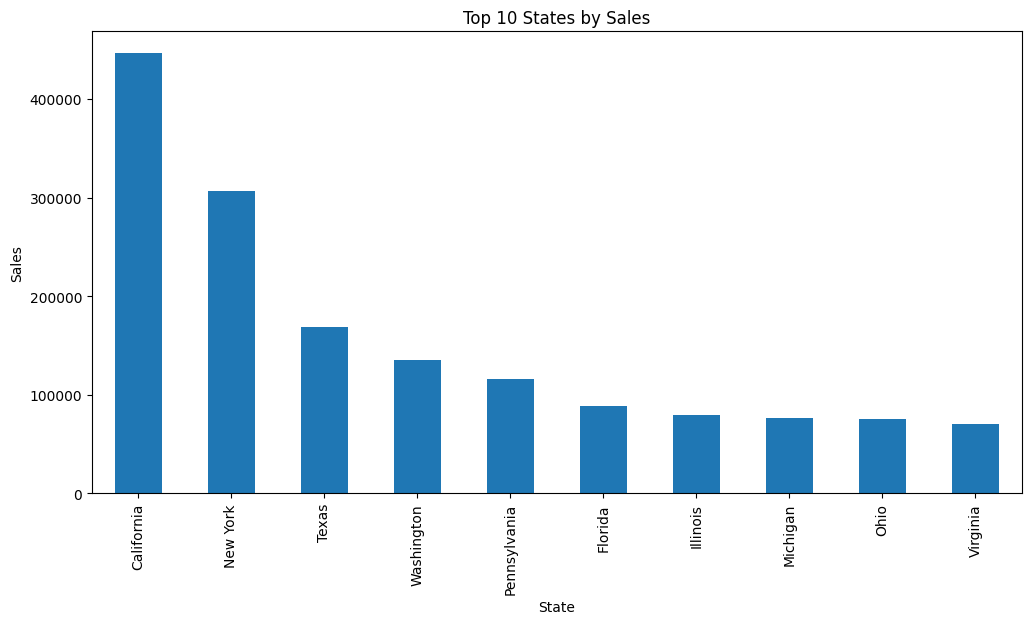

In [20]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

In [21]:
# Save the cleaned dataframe to a new CSV file
df.to_csv('cleaned_sales_data.csv', index=False)

In [22]:
from google.colab import files

# Save the cleaned dataframe to a new CSV file
df.to_csv('cleaned_sales_data.csv', index=False)

# Download the file to your local system
files.download('cleaned_sales_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>